<a href="https://colab.research.google.com/github/sukmaapsari/MSIB-ZENIUS/blob/main/Assessment_2_%5BNI_KETUT_CATUR_ADI_SUKMA_APSARI%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [36]:
df = pd.read_fwf("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt", skiprows = 42)
df

,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
0,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
2,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
3,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
4,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
781,2023,5,2023.3750,424.00,420.56,31,0.69,0.24
782,2023,6,2023.4583,423.68,421.22,29,0.57,0.20
783,2023,7,2023.5417,421.83,421.42,21,0.48,0.20
784,2023,8,2023.6250,419.68,421.55,21,0.45,0.19


In [37]:
df.columns=('Year','Month','Decimal Date','Monthly Average', 'De-season alized','Days', 'st.dev of days','unc.of mon mean')
df

,Year,Month,Decimal Date,Monthly Average,De-season alized,Days,st.dev of days,unc.of mon mean
0,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
2,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
3,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
4,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
781,2023,5,2023.3750,424.00,420.56,31,0.69,0.24
782,2023,6,2023.4583,423.68,421.22,29,0.57,0.20
783,2023,7,2023.5417,421.83,421.42,21,0.48,0.20
784,2023,8,2023.6250,419.68,421.55,21,0.45,0.19


In [38]:
df1 = df[['Year','Monthly Average']]
df1

,Year,Monthly Average
0,1958,317.45
1,1958,317.51
2,1958,317.24
3,1958,315.86
4,1958,314.93
...,...,...
781,2023,424.00
782,2023,423.68
783,2023,421.83
784,2023,419.68


In [39]:
df2 = df[['Year','Monthly Average','De-season alized']]
df2 = df2.loc[0:786, 'Year':'De-season alized']
df2

,Year,Monthly Average,De-season alized
0,1958,317.45,315.16
1,1958,317.51,314.71
2,1958,317.24,315.14
3,1958,315.86,315.18
4,1958,314.93,316.18
...,...,...,...
781,2023,424.00,420.56
782,2023,423.68,421.22
783,2023,421.83,421.42
784,2023,419.68,421.55


# Part 1

Mencari rata-rata level co2

In [40]:
df['Monthly Average'].mean()

358.52192111959283

Mencari standar deviasi level co2

In [41]:
df['Monthly Average'].std()

31.157956831028184

Mencari median level co2

In [42]:
df['Monthly Average'].median()

354.655

Mencari mean,standar deviasi,dan median menggunakan describe

In [43]:
df.describe()

,Year,Month,Decimal Date,Monthly Average,De-season alized,Days,st.dev of days,unc.of mon mean
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,1990.500000,6.500000,1990.999382,358.521921,358.515496,19.031807,-2.102583,-0.099389
std,18.922992,3.444279,18.921057,31.157957,31.090325,12.019634,4.536615,0.512893
min,1958.000000,1.000000,1958.287700,312.430000,314.710000,-1.000000,-9.990000,-0.990000
25%,1974.000000,4.000000,1974.645825,330.195000,330.507500,10.250000,0.162500,0.062500
50%,1990.500000,6.500000,1991.000000,354.655000,355.145000,25.000000,0.395000,0.150000
75%,2007.000000,9.000000,2007.354175,383.942500,383.852500,28.000000,0.560000,0.210000
max,2023.000000,12.000000,2023.708300,424.000000,422.020000,31.000000,1.310000,0.580000


berdasarkan data diatas dapat diambil informasi bahwa
1. rata rata level co 2 bulanan adalah 358.52192111959283
2. standar deviasi level co 2  bulanan adalah 31.157956831028184
3. median level co 2 bulanan adalah 354.655


# Part 2

Text(0.5, 1.0, 'Distribusi rata rata bulanan level Co2 ')

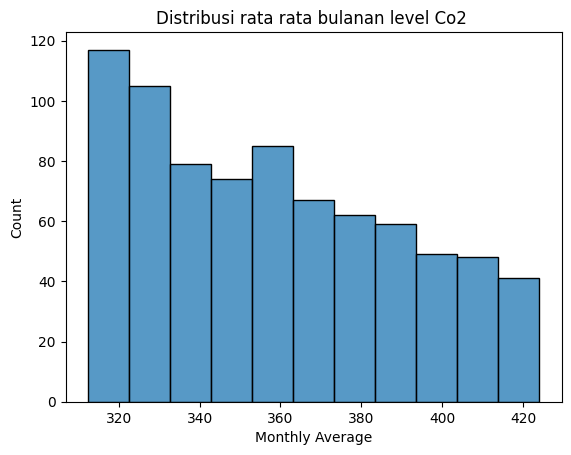

In [44]:
sns.histplot (data = df, x = 'Monthly Average')
plt.title('Distribusi rata rata bulanan level Co2 ')

grafik diatas merupakan visualisasi distribusi dari level CO2 menggunakan histogram berdasarkan data tahun 1958-2023 nilai rata-rata bulanan level co2  paling banyak terjadi diangka 310-330, dan nilai rata-rata bulanan paling sedikit terjadi pada angka 410-430

# Part 3

In [45]:
df1

,Year,Monthly Average
0,1958,317.45
1,1958,317.51
2,1958,317.24
3,1958,315.86
4,1958,314.93
...,...,...
781,2023,424.00
782,2023,423.68
783,2023,421.83
784,2023,419.68


Text(0.5, 1.0, 'Rata-Rata Bulanan Level Co2  ')

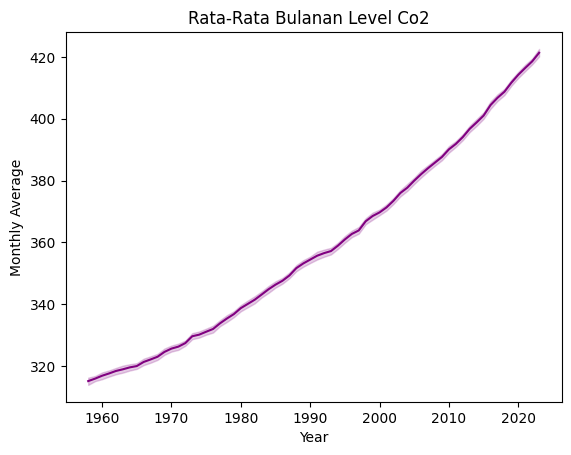

In [46]:
sns.lineplot(x="Year",y="Monthly Average",data=df1, color= 'purple')
plt.title('Rata-Rata Bulanan Level Co2  ')

Berdasarkan grafik garis diatas nilai dapat diambil informasi :
1. level rata-rata bulanan mengalami kenaikan setiap tahunya
2. nilai terendah yang tercatat  dibawah tahun 1960 dengan nilai  kurang angka 320,  
3. nilai tertinggi diatas tahun 2020 nilai mencapai angka diatas 420

# Part 4

In [47]:
df1

,Year,Monthly Average
0,1958,317.45
1,1958,317.51
2,1958,317.24
3,1958,315.86
4,1958,314.93
...,...,...
781,2023,424.00
782,2023,423.68
783,2023,421.83
784,2023,419.68


dataframe yang digunakan untuk membuat linear regression

<Axes: xlabel='Year', ylabel='Monthly Average'>

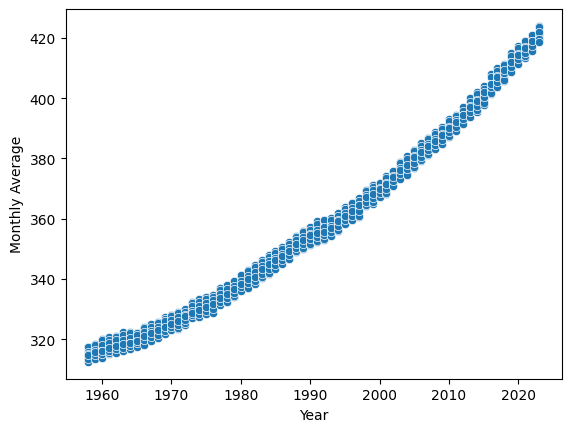

In [48]:
sns.scatterplot(x= 'Year', y='Monthly Average', data=df1)

In [49]:
df1.corr()

,Year,Monthly Average
Year,1.000000,0.988747
Monthly Average,0.988747,1.000000


hubungan antara Year dan monthly average adalah 0,988747 dengan demikian korelasi cukup kuat

In [50]:
#variabel indepedent
x_df1 = df1['Year']
X_df1 = x_df1 [:,np.newaxis]

#variabel dependent
y_df1 = df1['Monthly Average']

regressor = LinearRegression()
model = regressor.fit(X_df1, y_df1)

<ipython-input-50-d50fb844affc>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_df1 = x_df1 [:,np.newaxis]


membuat pemodelan

In [51]:
regressor.intercept_

-2882.0864679249416

ketika variabel tahun tidak mempengaruhi maka rata rata level co2 bulanan = -28882,086

In [52]:
regressor.coef_

array([1.62803737])

Dan kenaikan 1 satuan tahun, akan mempengaruhi level rata-rata co2 bulanan sebesar 1.628

Text(0.5, 1.0, 'Grafik linear')

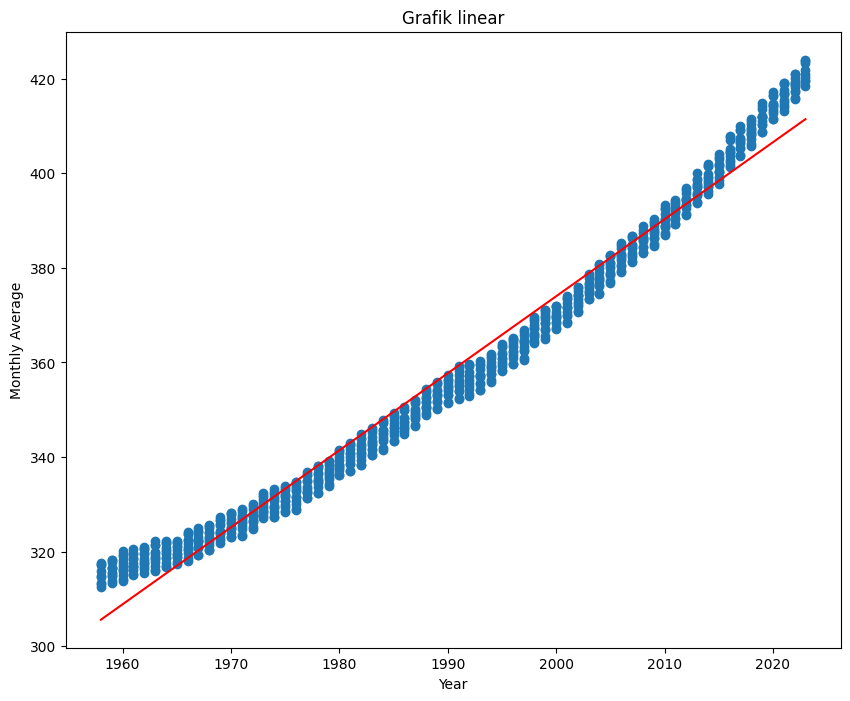

In [53]:
plt.figure(figsize = (10,8))
plt.scatter(X_df1, y_df1,)
y_pred = regressor.predict(X_df1)
plt.plot(X_df1,y_pred, color='red')


plt.xlabel('Year')
plt.ylabel('Monthly Average')
plt.title('Grafik linear')

grafik diatas adalah grafik hubungan antara variabel indepedent/bebas (Year) dan variabel dependent/terikat (monthly average), dimana garis merah tersebut merupakan hasil regresi untuk pemodelan prediksi antara tahun dan monthly average

In [54]:
x_new = np.array([[10000]])
y_pred = regressor.predict(x_new)
y_pred

array([13398.28725247])

Jika dilakukan prediksi untuk data baru, untu jarak 10000 satuan tahun maka level rata-rata bulanan adalah 13398.287

---



In [55]:
regressor.score(X_df1, y_df1)

0.9776207228448986

Hasil regresi liniear menggunakan pemodelan diatas didapat nilai 0.9776, atau 97,76%

# Part 5

In [56]:
df2

,Year,Monthly Average,De-season alized
0,1958,317.45,315.16
1,1958,317.51,314.71
2,1958,317.24,315.14
3,1958,315.86,315.18
4,1958,314.93,316.18
...,...,...,...
781,2023,424.00,420.56
782,2023,423.68,421.22
783,2023,421.83,421.42
784,2023,419.68,421.55


data frame diatas adalah data yang akan digunakan untuk menghitung cluster

<Axes: xlabel='Monthly Average', ylabel='De-season alized'>

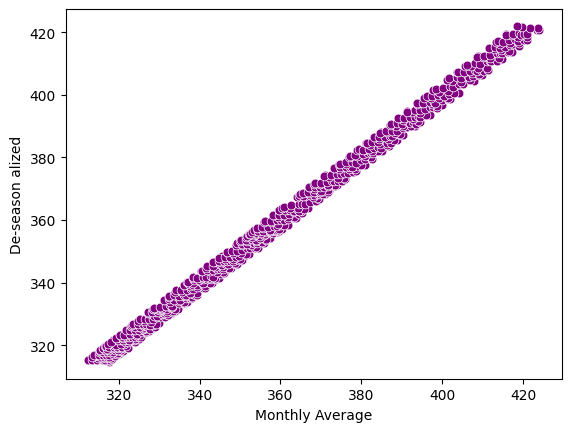

In [57]:
sns.scatterplot(x='Monthly Average', y='De-season alized', data=df2, s=40 ,color='purple')

grafik diatas merupakan grafik hubungan dan penyebaran antara de-season alized dan monthly average sebelum dikluster

In [58]:
#elbow methode
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df2.values)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

proses diatas adalah proses untuk menentukan cluster yang baik menggunakan elbow methode

Text(0.5, 1.0, 'Elbow Methode')

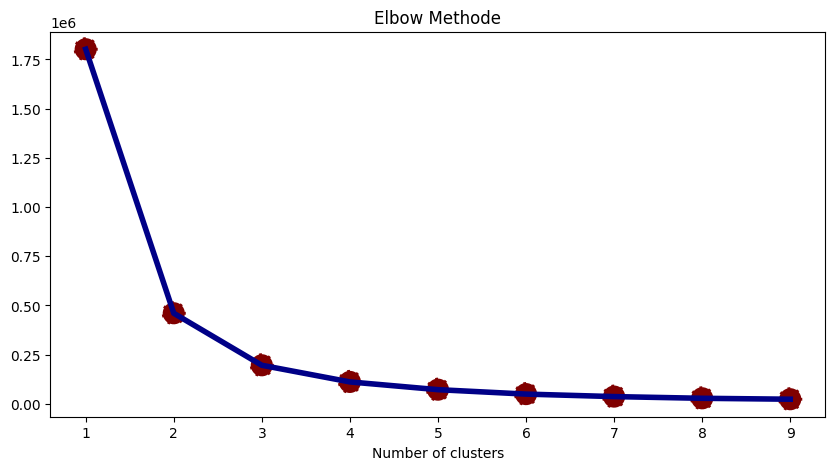

In [59]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 10), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xlabel ('Number of clusters')
plt.title ('Elbow Methode')

berdasarkan proses elbow methode dapat digambarkan dalam grafik diatas dimana titik klustering yang baik terdapat pada angka 4,

In [60]:
df2_array = np.array(df2)
df2_array

array([[1958.  ,  317.45,  315.16],
       [1958.  ,  317.51,  314.71],
       [1958.  ,  317.24,  315.14],
       ...,
       [2023.  ,  421.83,  421.42],
       [2023.  ,  419.68,  421.55],
       [2023.  ,  418.51,  422.02]])

Proses diatas merupakan proses dimana value pada df2 diubah menjadi sebuah array agar memudahlan perhitungan berikutnya

In [61]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df2_array)
x_scaled

array([[0.        , 0.04499417, 0.00419346],
       [0.        , 0.04553195, 0.        ],
       [0.        , 0.04311195, 0.00400708],
       ...,
       [1.        , 0.98055033, 0.99440872],
       [1.        , 0.96127991, 0.99562017],
       [1.        , 0.95079322, 1.        ]])

proses diatas adalah proses mengubah nilai array dari df2_array menjadi array dengan  rentang nilai 0 sampai 1

In [62]:
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

proses diatas adalah menentukan jumlah kluster yang baik berdasarkan elbow method yaitu 4, dengan memilih 4 titik pusat

In [63]:
kmeans.cluster_centers_

array([[0.15258512, 0.1030001 , 0.08628976],
       [0.68657106, 0.56302116, 0.5641736 ],
       [0.90188679, 0.83560649, 0.8466343 ],
       [0.44100075, 0.32555816, 0.31712768]])

array diatas merupakan 4 titik yang menjadi pusat kluster

In [64]:
kmeans.labels_
df2['kluster']=kmeans.labels_
df2

,Year,Monthly Average,De-season alized,kluster
0,1958,317.45,315.16,0
1,1958,317.51,314.71,0
2,1958,317.24,315.14,0
3,1958,315.86,315.18,0
4,1958,314.93,316.18,0
...,...,...,...,...
781,2023,424.00,420.56,2
782,2023,423.68,421.22,2
783,2023,421.83,421.42,2
784,2023,419.68,421.55,2


setelah itu, hasil dari kluster dimasukan kedalam dataframe agar mempermudah pembbuatan grafik

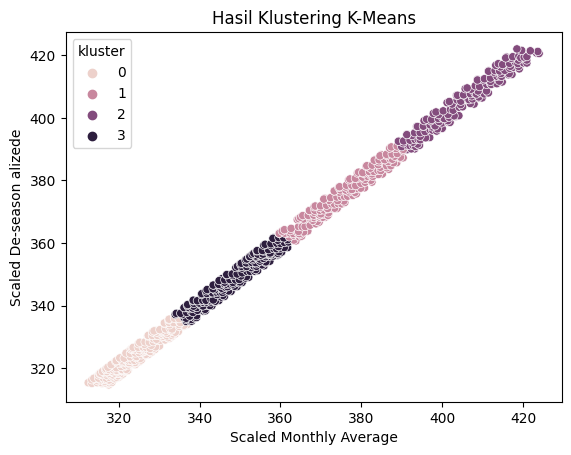

In [65]:
fig, ax = plt.subplots()
sns.scatterplot(data=df2 , x='Monthly Average', y='De-season alized',
                hue='kluster')


plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Monthly Average")
plt.ylabel("Scaled De-season alizede")
plt.show()

Grafik diatas merupakan grafik penyebaran de-season alized, dan monthly average yang sudah diproses menjadi 4 kluster

In [66]:
df['kluster'] = kmeans.labels_
df[['Monthly Average', 'De-season alized', 'kluster']].groupby('kluster').agg(['mean', 'median', 'std'])

Monthly Average                    De-season alized                   
                   mean   median       std             mean   median       std
kluster                                                                       
0            323.921721  323.125  6.047176       323.969754  322.970  5.868754
1            375.331461  374.735  8.470552       375.333933  374.970  8.455564
2            405.755127  405.950  9.507448       405.661266  406.045  9.378817
3            348.752524  348.945  7.572006       348.740971  348.640  7.503028

Berdasarkan tabel diatas adalah penjelasan tentang mean, median, dan std pada monthly average dan de-season alized yang telah dibagi menjadi 4 kluster.